In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('dados/card_transdata.tar.gz')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
X = df.drop(columns=['fraud'])
y = df['fraud']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=7)

In [6]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

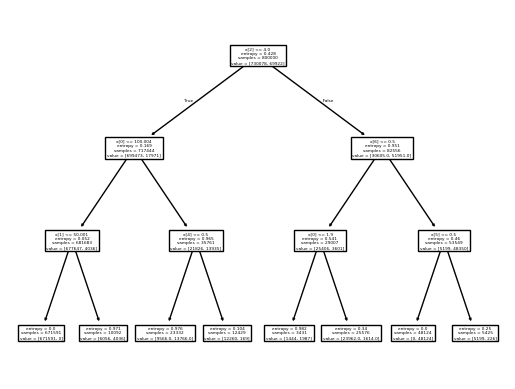

In [7]:
plot_tree(dt)
plt.show()

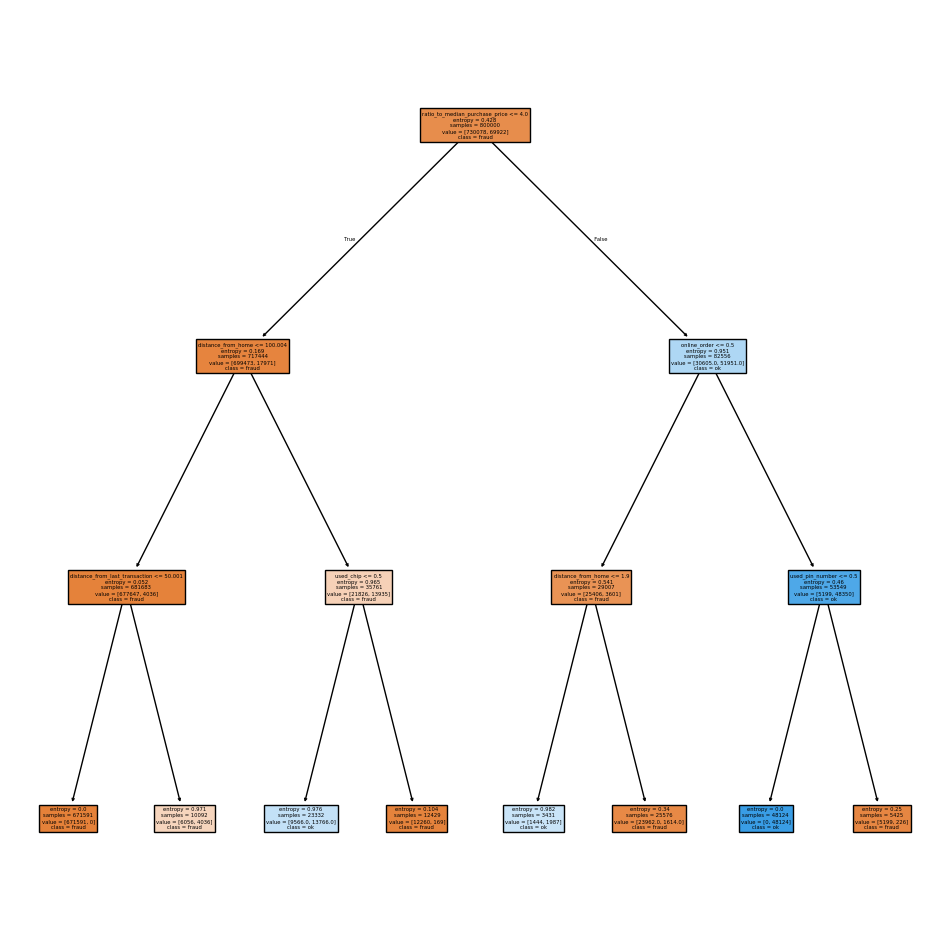

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dt,
          feature_names=df.drop(columns=['fraud']).columns.to_list(),
          class_names=['fraud', 'ok'],
          filled=True)
plt.show()

In [9]:
accuracy_score(y_test, y_pred)

0.97872